# Assignment5

## Ground Cricket Chirps

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

# Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8      and greater is considered a strong correlation.)
4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be      chirping?
5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate    of 18 chirps per second. What was the approximate ground temperature that morning?

1. Find the linear regression equation for this data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [6]:
df.shape

(15, 2)

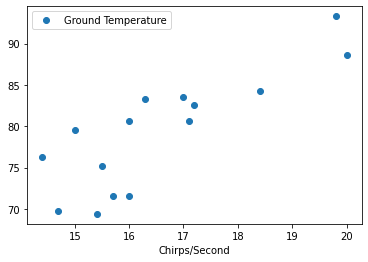

In [7]:
df.plot(x='Chirps/Second', y='Ground Temperature', style='o')

plt.show()

<AxesSubplot:xlabel='Chirps/Second', ylabel='Ground Temperature'>

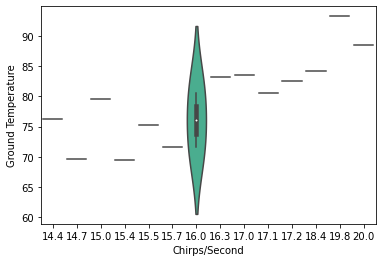

In [8]:
import seaborn as sns
sns.violinplot(x='Chirps/Second', y='Ground Temperature', data=df)

In [9]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [10]:
y = df.iloc[:, -1]
y

0     88.6
1     71.6
2     93.3
3     84.3
4     80.6
5     75.2
6     69.7
7     71.6
8     69.4
9     83.3
10    79.6
11    82.6
12    80.6
13    83.5
14    76.3
Name: Ground Temperature, dtype: float64

In [11]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values 
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)

In [12]:
# Find the linear regression equation for this data.
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([75.42413074, 77.16154437, 76.11909619, 90.3658879 , 73.68671712,
       71.60182077])

2. Chart the original data and the equation on the chart.


In [14]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,75.2,75.424131
1,71.6,77.161544
2,71.6,76.119096
3,93.3,90.365888
4,79.6,73.686717
5,76.3,71.601821


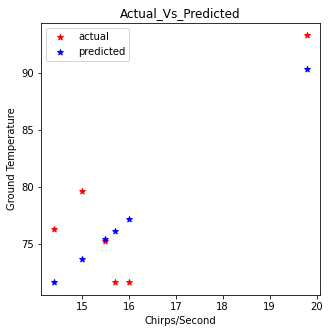

In [19]:
#changing size of plot
plt.figure(figsize=(5,5))
plt.ylabel("Ground Temperature")
plt.xlabel("Chirps/Second")
plt.scatter(X_test,y_test,color ="r",label = "actual",marker = "*")
plt.scatter(X_test,y_pred,color ="b",label = "predicted",marker = "*")
plt.title("Actual_Vs_Predicted")

#adding legend
plt.legend()
plt.show()

3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


In [15]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.6445140096604121


4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [16]:
c = regressor.intercept_
m = regressor.coef_

In [17]:
x = (95-c) / m 
x

array([21.13362374])

5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [18]:
regressor.predict([[18]])

array([84.11119886])